In [37]:
import pandas as pd

# Memuat dataset
file_path = '/content/CreditDataset.csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      1000 non-null   object
 1   x2      1000 non-null   int64 
 2   x3      1000 non-null   object
 3   x4      1000 non-null   object
 4   x5      1000 non-null   int64 
 5   x6      1000 non-null   object
 6   x7      1000 non-null   object
 7   x8      1000 non-null   int64 
 8   x9      1000 non-null   object
 9   x10     1000 non-null   object
 10  x11     1000 non-null   int64 
 11  x12     1000 non-null   object
 12  x13     1000 non-null   int64 
 13  x14     1000 non-null   object
 14  x15     1000 non-null   object
 15  x16     1000 non-null   int64 
 16  x17     1000 non-null   object
 17  x18     1000 non-null   int64 
 18  x19     1000 non-null   object
 19  x20     1000 non-null   object
 20  Class   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


(    x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
 0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
 1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
 2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
 3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
 4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   
 
     x15 x16   x17 x18   x19   x20 Class  
 0  A152   2  A173   1  A192  A201     1  
 1  A152   1  A173   1  A191  A201     2  
 2  A152   1  A172   2  A191  A201     1  
 3  A153   1  A173   2  A191  A201     1  
 4  A153   2  A173   2  A191  A201     2  
 
 [5 rows x 21 columns],
 None)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Encode categorical variables
X_encoded = X.apply(LabelEncoder().fit_transform)

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 20), (200, 20), (800,), (200,))

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Build and train the SVM classifier
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC and AUC

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, svm_model.decision_function(X_test))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=2)

accuracy, precision, recall, f1, auc  # Display metrics and sample ROC points


(0.755, 0.7421505376344086, 0.755, 0.7437288135593221, 0.7753571428571427)

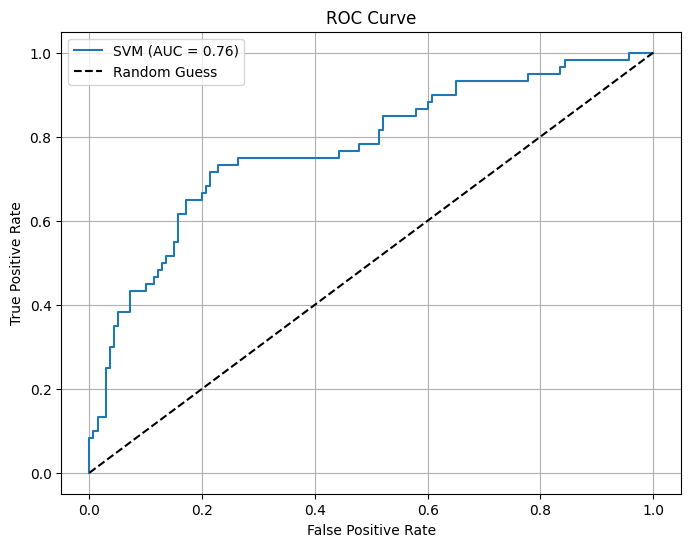

In [40]:
# ROC Curve with specified positive label
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=2)

# Visualize the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='SVM (AUC = {:.2f})'.format(svm_model.score(X_test, y_test)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
